#### This Notebook Fits and Evaluates Naive Bayes for all three datasets

    Let's Load all the necessary modules:

In [68]:
import pandas as pd
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from normalizer import Normalizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from results import ModelEvaluation
from joblib import dump

    Lets write some macros for I/O

In [52]:
def print_info(msg):
    print("[INFO] "+str(msg))

def print_err(msg):
    print("[ERR] "+str(msg))

    Let's initialize some objects that we need through-out

In [53]:
normalizer = Normalizer()
results = ModelEvaluation()
print_info("OBJECTS INIT DONE.")

[INFO] OBJECTS INIT DONE.


    Let's load all the datasets:

In [54]:
TwitterData = pd.read_csv("../dataset/TwitterDataset.txt", sep="\t")
print_info("Twitter Dataset is now loaded.")
NewsHeadlinesData =  pd.read_json("../dataset/Sarcasm_Headlines_Dataset.json", lines = True)
print_info("NewHeadlines Dataset is now loaded.")

[INFO] Twitter Dataset is now loaded.
[INFO] NewHeadlines Dataset is now loaded.


    Let's explore each of these Datasets:

In [55]:
print_info("Changing feature names for data compatibility wihtin News Headlines Dataset")
NewsHeadlinesData.columns =["link", "text", "label"]
print_info("The Features have been renamed.")
print_info("Dropping irrelevant features from this dataset")
NewsHeadlinesData = NewsHeadlinesData.drop(columns=["link"])
print_info("NewsHeadlinesData.Link has been dropped.")
print_info("The following is information related to NewsHeadlines:")
print_info("News Headlines Dataset information:\n")
NewsHeadlinesData.info()

[INFO] Changing feature names for data compatibility wihtin News Headlines Dataset
[INFO] The Features have been renamed.
[INFO] Dropping irrelevant features from this dataset
[INFO] NewsHeadlinesData.Link has been dropped.
[INFO] The following is information related to NewsHeadlines:
[INFO] News Headlines Dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    26709 non-null  object
 1   label   26709 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 417.5+ KB


In [56]:

print_info("The Twitter set does not have any column names, adding same feature names as NewsHeadlinesDataset")
TwitterData.columns = ["sample", "label", "text"]
print_info("Feature names have been updated.")
print_info("Dropping irrelevant features")
TwitterData = TwitterData.drop(columns= ["sample"])
print_info("Irrelevant features have been dropped")
print("Twitter Dataset information: \n")
TwitterData.info()

[INFO] The Twitter set does not have any column names, adding same feature names as NewsHeadlinesDataset
[INFO] Feature names have been updated.
[INFO] Dropping irrelevant features
[INFO] Irrelevant features have been dropped
Twitter Dataset information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39776 entries, 0 to 39775
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   39776 non-null  int64 
 1   text    39776 non-null  object
dtypes: int64(1), object(1)
memory usage: 621.6+ KB


# 1. Headlines Dataset:

    Get the sparse matrix for this text:

In [57]:
news_matrix = normalizer.vectorize(pd.DataFrame({"text": NewsHeadlinesData["text"].astype("str")}))
print_info("Here's the sprase matrix info: ")
news_matrix

[INFO] Trying to create a sparse matrix for text, using an instance of TfIdf_vectorizer
[INFO] Extracting columns containing text from dataframe.
[INFO] Successfully extracted text columns from the dataset.
[INFO] Applying Normalization over text:
[INFO]       - Converting Text into lower case for caseconsistency.
[INFO]       - Extracting only words containing alphabets.
[INFO] Text Normalization is now complete.
[INFO] Fitting the vecotirzer to given text.
[INFO] Transforming the text into a sparse matrix.
[INFO] Sparse Matrix has been successfully created over the text given as input.
[INFO] Here's the sprase matrix info: 


<26709x25661 sparse matrix of type '<class 'numpy.float64'>'
	with 254896 stored elements in Compressed Sparse Row format>

    Hold out data for testing:

In [58]:
print_info("Attempting to split data into train and test sets.")
y_news = NewsHeadlinesData["label"].astype("int")
X_news = news_matrix.toarray()
X_news_train, X_news_test, y_news_train, y_news_test = train_test_split(X_news, y_news, test_size=0.20, random_state=42)
print_info("Subsets created successfully.")

[INFO] Attempting to split data into train and test sets.
[INFO] Subsets created successfully.


    Lets fit a NB for this set:

In [60]:
print_info("Creating a new instance of Naive Bayes for News Headlines")
NB_news = MultinomialNB()
print_info("Fitting a Naive Bayes to this")
NB_news.fit(X_news_train, y_news_train)
print_info("DONE.")

[INFO] Creating a new instance of Naive Bayes for News Headlines
[INFO] Fitting a Naive Bayes to this
[INFO] DONE.


    Let's test the Naive Bayes for News Headlines:

In [61]:
print_info("Asking the Naive Bayes trained on News Headlines to make some Predictions")
y_news_pred = NB_news.predict(X_news_test)
print_info("Predictions have been obtained.")


[INFO] Asking the Naive Bayes trained on News Headlines to make some Predictions
[INFO] Predictions have been obtained.


    Let's look at the Performance for Naive Bayes on News Headlines:

In [64]:
print_info("The following are the evaluation metrics for NB over news headlines:")
results.classification_report(y_news_test, y_news_pred)

[INFO] The following are the evaluation metrics for NB over news headlines:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85      2996
           1       0.89      0.67      0.76      2346

    accuracy                           0.82      5342
   macro avg       0.84      0.80      0.81      5342
weighted avg       0.83      0.82      0.81      5342



    Confusion Matrix for NB over NewsHeadlines Dataset:

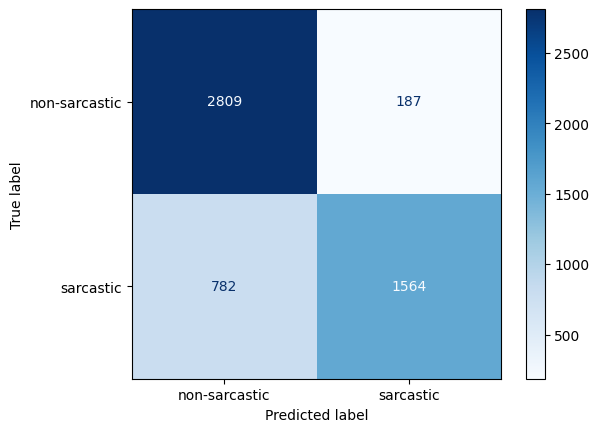

In [65]:
results.get_cm(y_true=y_news_test, y_pred=y_news_pred)

    Let's Look at current ROC_AUC and use best threshold for prediction of values.

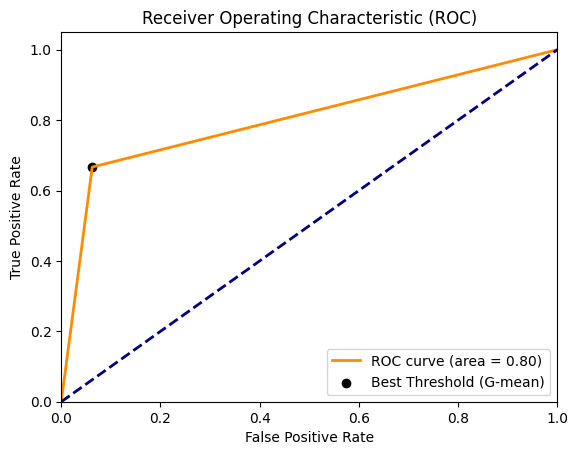

Best Threshold=1.0000


In [66]:
y_proba_news = NB_news.predict_proba(X_news_test)[:,1]
news_threshold = results.get_roc(y_news_test, y_news_pred)

The best threshold obtained is not useful for being applied lets move on.

    Save this Model:

In [69]:
dump(NB_news, "../FinalModels/models/NewsHeadlines_NaiveBayes.joblib")

['../FinalModels/models/NewsHeadlines_NaiveBayes.joblib']